In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [34]:
# function that returns dy/dt
def oscillator(x, y, t, i, alpha, A, omega, twist, K): 
    
    x1 = x[i]
    y1 = y[i]
    dx1dt = x1*alpha*(A-np.sqrt(x1**2 + y1**2)) - y1*(omega + twist*(A - np.sqrt(x1**2 + y1**2))) + K*(np.mean(x))
    dy1dt = y1*alpha*(A-np.sqrt(x1**2 + y1**2)) + x1*(omega + twist*(A - np.sqrt(x1**2 + y1**2)))

    return dx1dt, dy1dt

def oscillator_system(state_vector, t, alpha, A, omega, twist, K):

    state_mat = np.array(state_vector).reshape(-1, 2)
    x = state_mat[:, 0]
    y = state_mat[:, 1]
    
    n = state_mat.shape[0]
    
    dzdt = np.zeros((n, 2))
    
    for i in range(n):
        dzdt[i, ] = oscillator(x, y, t, i, alpha, A, omega, twist, K)

    return dzdt.reshape(-1).tolist()

t = np.linspace(0, 500, 1000)

params = (0.1,1,(np.pi*2)/24, 0.2, 0.05) #Turn twist up just a bit, and you'll see a very different pic
state0 = [4, 4, 1, 1, 2, 2, 3, 3, 5, 5]

x1 = odeint(oscillator_system, state0, t, args = (params))

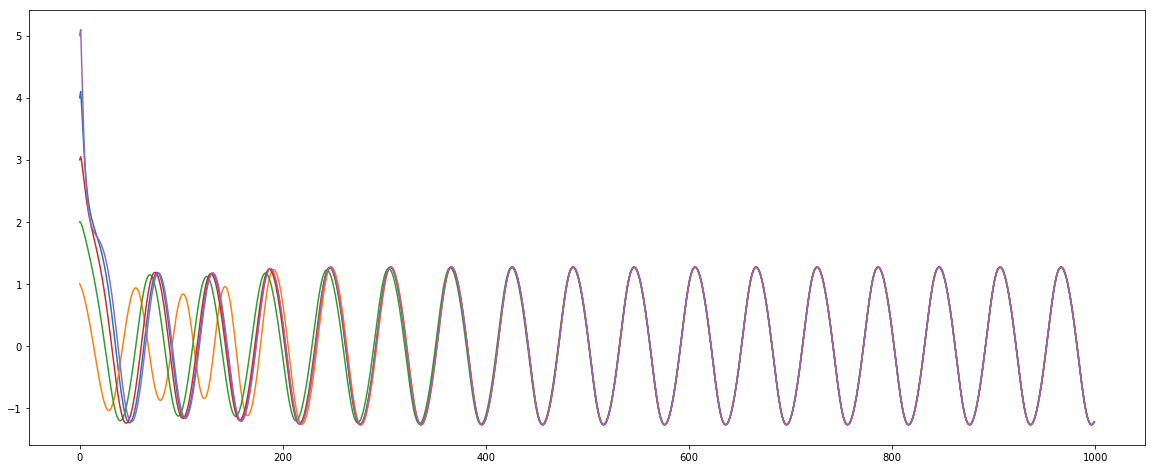

In [35]:
plt.figure(figsize=(20,8))

n = int(len(state0) / 2)

for i in range(n):
    plt.plot(x1[:, 2 * i], label = 'x coord of {}st osc'.format(i))